# Replaying the Interaction Dataset

This notebook shows how to use the interaction dataset in bark. Details on the dataset: https://arxiv.org/abs/1910.03088

In [1]:
from bark.runtime.scenario.scenario_generation.interaction_dataset_scenario_generation import \
    InteractionDatasetScenarioGeneration
from bark.runtime.commons.parameters import ParameterServer
from bark.runtime.viewer.matplotlib_viewer import MPViewer
from bark.runtime.viewer.video_renderer import VideoRenderer
import os
import os.path
import argparse
import matplotlib.pyplot as plt

Make sure you have access to the repository `interaction_dataset_fortiss_internal` and make it available by commenting out the command 
```
git_repository(
 name = "interaction_dataset_fortiss_internal",
 commit = "4152cdddcb04efa9a54524f9d737d1e89b1eafad",
 remote = "https://git.fortiss.org/autosim/interaction_dataset"
)
```

in the top level Workspace file.

Then, start the notebook server with `bazel run docs/tutorials:run --define interaction_dataset_present=true`

Here, we specify which slize of the dataset shall be loaded. **Note that the files have to exist!** The dataset itself is not included in bark! We here specify the parameters:
- The map: "MapFilename"
- The vehicle trajectories: "TrackFilename"
- Which vehicles: "TrackIds"
- Start time: "StartTs"
- End Time: "EndTs"
- Who's treated as ego agent (aka. where are metrics evaluated): "EgoTrackId"


In [2]:
# Lets define the secnario:
param_server = ParameterServer()
param_server["Scenario"]["Generation"]["InteractionDatasetScenarioGeneration"]["MapFilename"] = os.path.expanduser('~') +"/bark-simulator/interaction_dataset_fortiss_internal/DR_DEU_Merging_MT/map/DR_DEU_Merging_MT_v01_shifted.xodr"
param_server["Scenario"]["Generation"]["InteractionDatasetScenarioGeneration"]["TrackFilename"] = os.path.expanduser('~') +"/bark-simulator/interaction_dataset_fortiss_internal/DR_DEU_Merging_MT/tracks/vehicle_tracks_013.csv"
param_server["Scenario"]["Generation"]["InteractionDatasetScenarioGeneration"]["TrackIds"] = [63,64,65,66,67,68]
param_server["Scenario"]["Generation"]["InteractionDatasetScenarioGeneration"]["StartTs"] = 232000
param_server["Scenario"]["Generation"]["InteractionDatasetScenarioGeneration"]["EndTs"] = 259000
param_server["Scenario"]["Generation"]["InteractionDatasetScenarioGeneration"]["EgoTrackId"] = 65

In [ ]:
# Create the scenario
scenario_generation = InteractionDatasetScenarioGeneration(num_scenarios=1, random_seed=0, params=param_server)
scenario = scenario_generation.create_single_scenario()

In [ ]:
# Initialize
sim_step_time = 0.2
sim_time_steps = 5

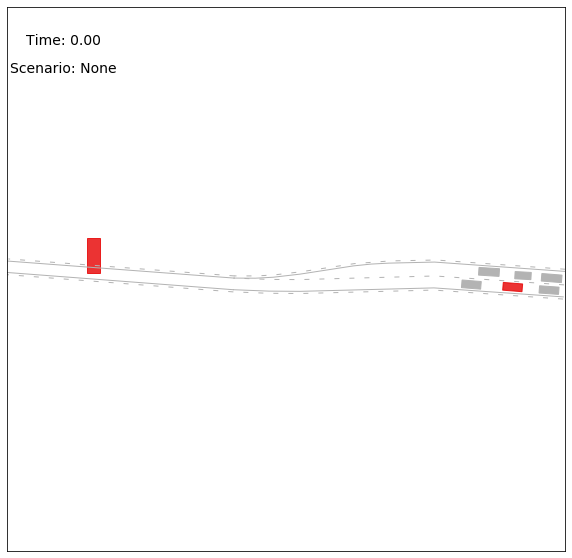

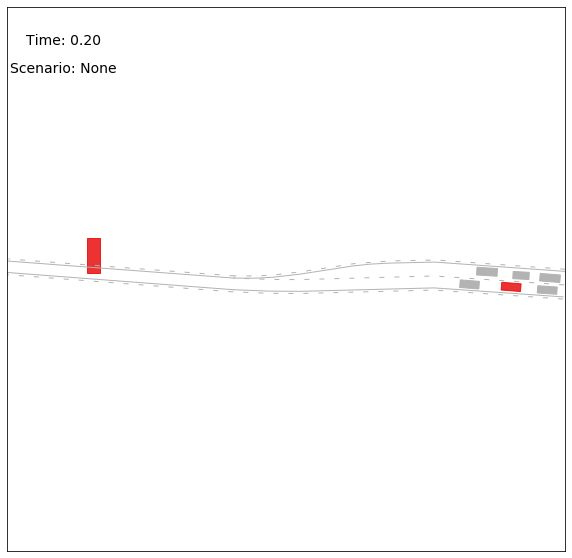

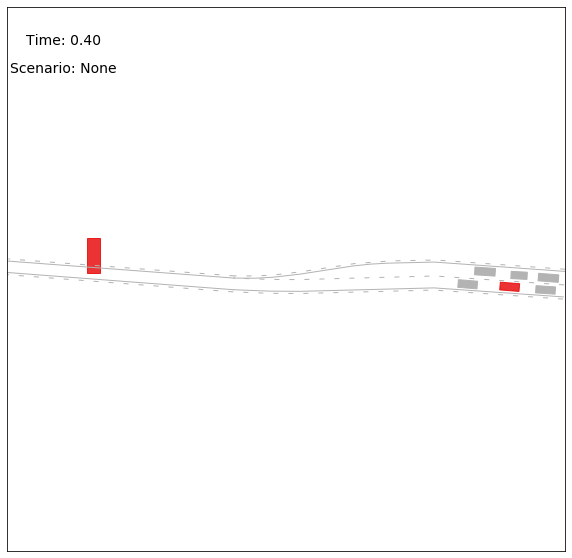

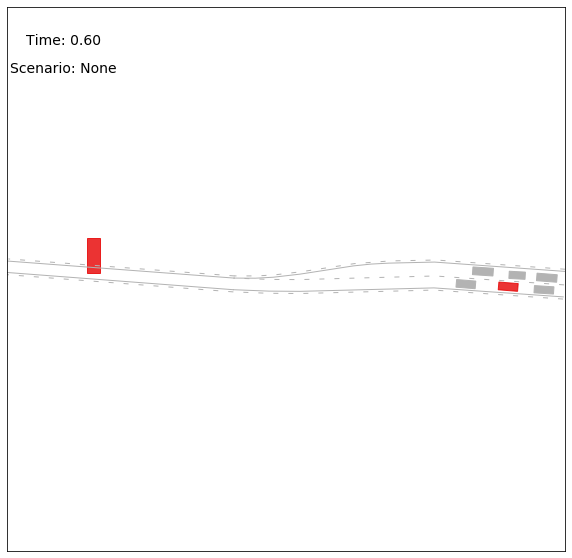

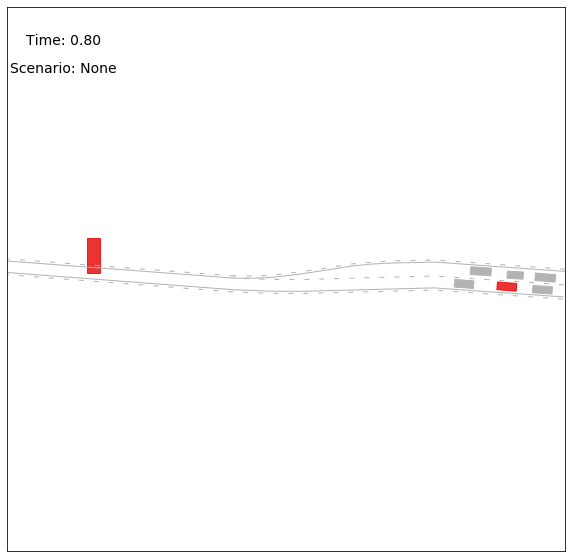

In [11]:
# TODO maybe someone finds a way to reuse one plot 

# Run the scenario in a loop
world_state = scenario.GetWorldState()
for _ in range(0, sim_time_steps):
    world_state.PlanAgents(sim_step_time)
    fig = plt.figure(figsize=[10, 10])
    viewer = MPViewer(params=param_server, use_world_bounds=True, axis=fig.gca())
    viewer.drawWorld(world_state, scenario._eval_agent_ids)
    world_state.DoExecution(sim_step_time)

# Replacing an Agent

Based on the above, we replace one agent with another agent model. For this, we just add a parameter to the server. Here we chose the replate the agent 67 with an IDM with standard parameters.

In [12]:
# Insert IDM Agent
param_server_idm = param_server
param_server_idm["Scenario"]["Generation"]["InteractionDataset"]["BehaviorModel"] = {"67":"BehaviorIDMClassic"}

In [13]:
# Override the scenario
scenario_generation_idm = InteractionDatasetScenarioGeneration(num_scenarios=1, random_seed=0, params=param_server_idm)
scenario = scenario_generation_idm.create_single_scenario()

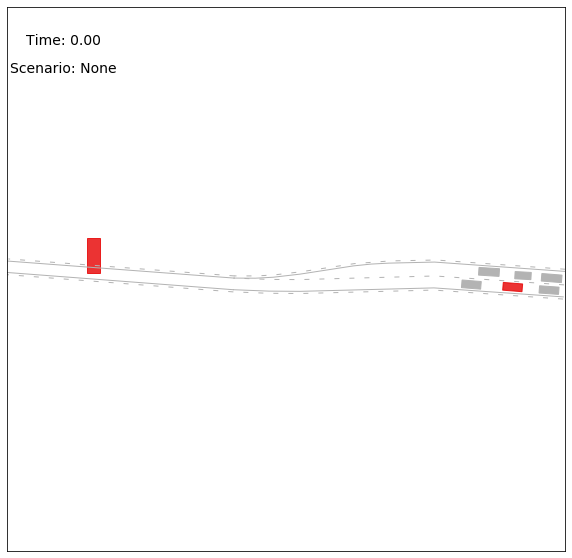

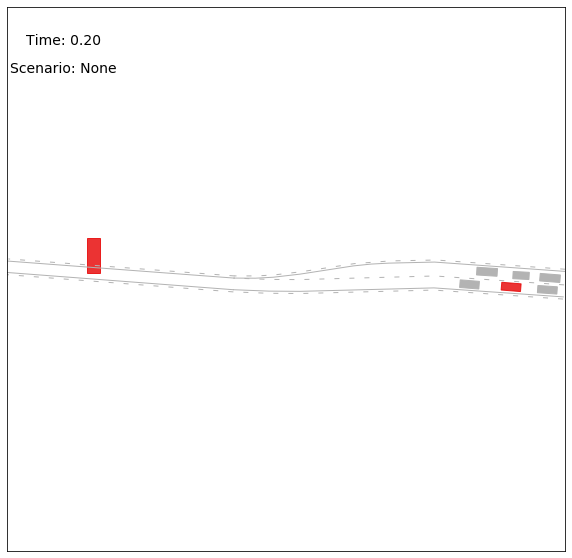

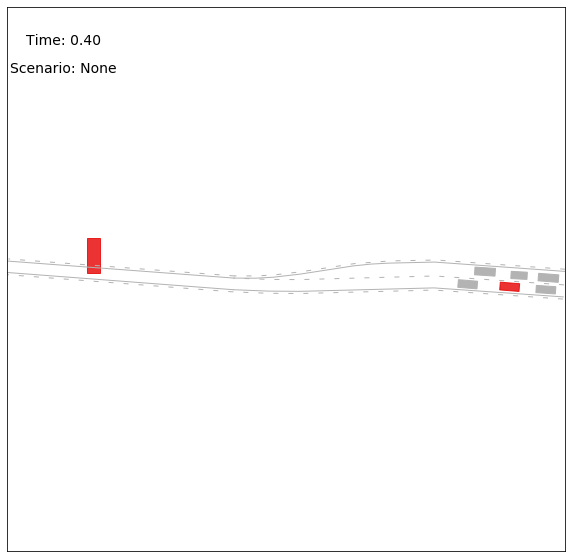

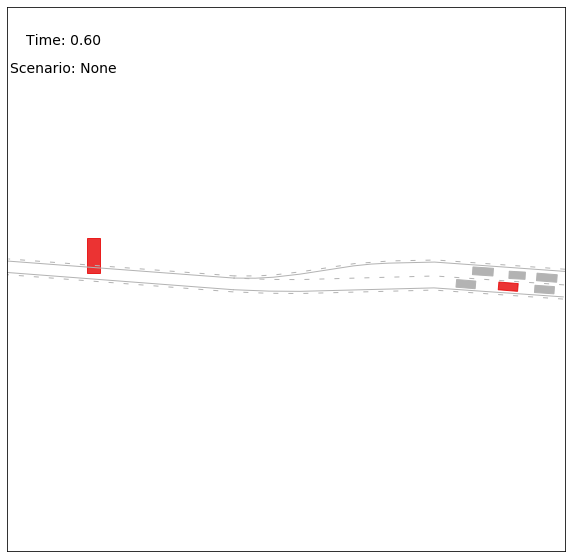

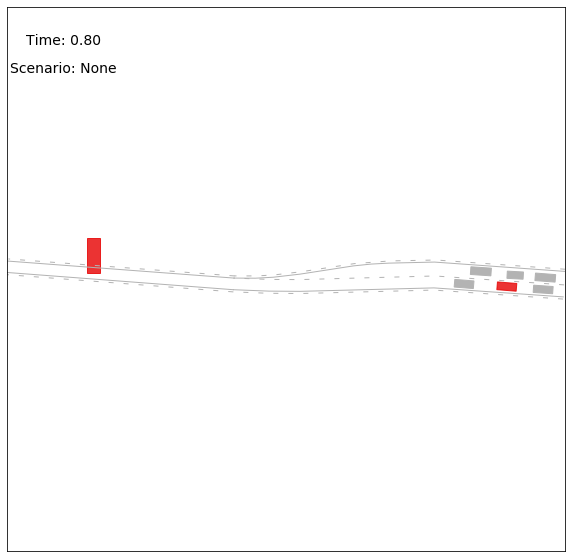

In [14]:
# TODO maybe someone finds a way to reuse one plot 

# Run the scenario
world_state = scenario.GetWorldState()
for _ in range(0, sim_time_steps):
    world_state.PlanAgents(sim_step_time)
    fig = plt.figure(figsize=[10, 10])
    viewer = MPViewer(params=param_server, use_world_bounds=True, axis=fig.gca())
    viewer.drawWorld(world_state, scenario._eval_agent_ids)
    world_state.DoExecution(sim_step_time)

That's it. We now have replayed one slice of the interaction dataset in bark and inserted an IDM agent, that is abel to follow the given traffic.